# ECFS protocol and Analysis

The goal of this file is to provide all the functions needed to format the dataframe for the ECFS algorithn, and posteiror analysis of the obtained results.

The functions listed below will:
1. Format the dataframe so that it can be imported in MATLAB.
2. Format the MATLAB output to continue the analyisis in Python.
3. Compute the **Network-Community analysis** together with the **h-scores** used for the calculation of entropy, i.e. disorder in the community structure.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms import community
import matplotlib
import itertools

In [2]:
geneID = pd.read_excel("geneID_ens_symbol_KSranked.xlsx")
geneID.head(20)

,ensID,symbol
0,ENSMUSG00000028773,Fabp3
1,ENSMUSG00000102433,Gm38050
2,ENSMUSG00000044471,Lncpint
3,ENSMUSG00000071533,Pcnp
4,ENSMUSG00000020863,Luc7l3
5,ENSMUSG00000030771,Micalcl
6,ENSMUSG00000028053,Ash1l
7,ENSMUSG00000086712,AI427809
8,ENSMUSG00000032595,Cdhr4
9,ENSMUSG00000032679,Cd59a


In [3]:
df_filteredKS = pd.read_csv("df_filteredKS.csv", sep="\t")
df_filteredKS

,geneID,G7F_mean,G7FNSen_mean,G7FSen_mean,G7M_mean,G7MNSen_mean,G7MSen_mean,G7S_mean,G7SNSen_mean,G7SSen_mean,...,G3SSen_mean,Y3F_mean,Y3FNSen_mean,Y3FSen_mean,Y3M_mean,Y3MNSen_mean,Y3MSen_mean,Y3SNSen_mean,Y3SSen_mean,Y3S_mean
0,ENSMUSG00000026154,9.374707,12.772968,27.824232,5.671751,11.260086,16.675180,0.000000,6.299948,16.657781,...,45.174186,21.242280,26.628339,33.862152,21.526737,31.649925,47.899333,26.170418,48.272665,4.519765
1,ENSMUSG00000101372,1.444587,1.111497,0.371584,0.699926,0.330705,0.364940,1.624852,0.486327,0.348787,...,0.114060,0.582884,0.373457,0.367516,0.367600,0.055509,0.210572,0.539133,0.318045,1.040053
2,ENSMUSG00000026087,22.069027,25.173005,43.724768,16.839861,20.386269,26.003121,20.099141,31.424203,30.086606,...,32.878457,19.962933,27.788901,33.128654,15.660406,23.192990,32.742092,38.338612,40.461611,11.934976
3,ENSMUSG00000041763,18.230442,11.950132,12.110390,28.941241,17.719509,14.524426,27.617458,16.755259,17.023425,...,11.825596,12.635614,12.746935,11.025465,15.401941,12.587769,12.309141,21.549588,12.849492,28.855441
4,ENSMUSG00000025982,112.095088,84.476640,55.605328,83.438708,65.120788,51.364688,120.530328,74.634990,59.653100,...,40.601267,87.341269,63.008648,46.958564,61.851565,74.434975,44.904032,61.191470,50.753543,147.272977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,ENSMUSG00000031385,0.000000,0.367214,0.398137,0.000000,0.000000,0.068053,0.000000,0.000000,1.463048,...,0.326122,0.000000,0.263454,0.184928,0.000000,0.000000,0.273452,0.000000,0.247827,0.000000
138,ENSMUSG00000002014,36.531070,61.966370,94.802257,64.016520,57.620877,83.569053,31.541450,29.319517,29.808617,...,85.980737,61.723820,126.512300,155.044933,50.799810,55.415170,88.717490,31.050667,58.336110,26.443985
139,ENSMUSG00000031198,22.257823,26.709863,36.829580,13.182433,13.808850,21.667137,8.334765,25.366677,35.125597,...,38.596550,38.528550,35.038627,39.704690,20.947253,17.393723,43.456097,34.126103,43.358643,7.465416
140,ENSMUSG00000025525,1.787333,2.887403,7.121444,3.833947,3.837358,8.342085,3.408360,8.749270,17.766763,...,18.968587,2.519863,12.714293,8.579726,4.221943,4.453317,18.298710,18.434093,41.276830,3.720032


## 1 Dataframe formatting for MATLAB import

In [4]:
def select_cell_type(df, cell_type = "all"):
    """
    Function that inputs a dataframe and selects cell types according to the input string.
       The input strings can be:
       1. "F" for selecting only FAP cells 
       2. "M" for selecting only Macrophage cells
       3. "S" for selecting only Satellite cells
       3. "all" for selecting all cell types
       Finally, it stores the df into a dataframe named df_output.
    """

    
    if cell_type == "F":
        df_output = df.filter(regex='F|geneID')    
    if cell_type == "M":
        df_output = df.filter(regex='M|geneID')
    if cell_type == "S":
        lst = list(df.filter(regex = 'F|M').columns)
        df_output = df[df.columns.difference(lst)]
        first_col = df_output.pop('geneID')
        df_output.insert(0, 'geneID', first_col)
    if cell_type == "all":
        df_output = df
        
    return df_output

In [ ]:
def df_processing(import_file, parent_directory, norm = True, cell_type = 'all'):
    """
    Function that inputs a dataframe of format: rows = genes, columns = cell conditions
    and outputs a df of format: rows = cell conditions, columns = genes 
    that has standarized gene expression values between [0,1] if norm is set to TRUE.
    Also, it adds a class column where a class is indicated as 1 (Sen) or 0 (Nsen). 
    This formatting is necessary because this is the format that is required by 
    the MATLAB ECFS algorithm.
    """
    import pandas as pd
    df = pd.read_csv(import_file, sep="\t")
    df = select_cell_type(df, cell_type)
    
    #0. extracting gene_id and values in different dataframes
    df_geneid = df["geneID"]
    df_geneid = df_geneid.to_frame().reset_index(drop=True)
    df_values = df.drop(["geneID"], axis=1)
    
    #1. standardization of rows in range [0,1] and keeping column names if norm is set tu TRUE    
    
    if norm == True:
        norm = 'normalized'
        import pandas as pd
        from sklearn import preprocessing
 
        x = preprocessing.minmax_scale(df_values.values.T).T
        df_norm = pd.DataFrame(x, columns = df_values.columns)
            
        df_standard = df_geneid.join(df_norm)
    else:
        norm = ''
        df_standard = df
 

    #2. transposing dataframe
    df_transposed = df_standard.T
    header_row = "geneID"
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed.reset_index(drop=False)
    df_transposed = df_transposed.rename(columns={"index": "type"})
    df_transposed = df_transposed.drop([0])
    
    #3. adding class label to the dataframe
    df_class = df_transposed 
    df_class['class'] = [0 if (("NSen" in x) or (len(x)==3)) else 1 for x in df_class['type']]
    df_class.reset_index()
    dataframe = df_class
    df_export = df_class.drop(['type'], axis = 1)
    
    #putting the new file and import file in the created folder
    import os
    directory = str(import_file) + "_" + "ECFS_protocol" 
    path = os.path.join(parent_directory, directory)
    os.makedirs(path)
    filename = import_file[:-4] +'_' + "geneset" + '_' + str(cell_type) + norm +".csv"
    export_file = os.path.join(path, filename)
    df_export.to_csv(export_file, sep='\t')
    
    path_import_file = os.path.join(path, import_file)
    df.to_csv(path_import_file, sep='\t', index=False)

    return df_export

In [ ]:
df142 = df_processing("df_filteredKS.csv", parent_directory = "df_filteredKS_142", norm = False, cell_type = "all")

## 2 Dataframe formatting for MATLAB export

The ranking that is the output of the MATLAB agorithm has the following format:

|  ranking | feature column number  |
|---|---|
| 1  |  17 |  
| 2  |  83 | 
| 3 |  38 |
| . |  . | 
| . |  .| 
| n-1 |  41 | 
| n |  122 | 

It is important to take into account that the MATLAB indices start from 1, so the feature column number 17 corresponds to the row 16 of the Python dataframe.


The goal is to order the genes from the dataframe in Python, that has the format

| index |  geneID | GF7B  | GF7Sen  | ...  | YSNSen  |
| ---|---|---|---|---|---|
| 0| ENSMUSG00000023198  | 0.23  | 0.76  | 12.1  | 15.8  |
| 1|  ENSMUSG00000027198 | 1.3  | 0.76  | 12.1  | 15.8  |
| 2| ENSMUSG00000043298  | 2.63  | 7.66  | 1.14  | 18.5  |
| ...  |.. | ..  | ..  | ...  |

in the order that is determined by the ranking from the MATLAB output.
Like this:

| index |  geneID | GF7B  | GF7Sen  | ...  | YSNSen  |
| ---|---|---|---|---|---|
| 16| ENSMUSG00000023198  | 0.23  | 0.76  | 12.1  | 15.8  |
| 82| ENSMUSG00000027198 | 1.3  | 0.76  | 12.1  | 15.8  |
| 37| ENSMUSG00000043298  | 2.63  | 7.66  | 1.14  | 18.5  |
| ...  |.. | ..  | ..  | ...  |


In [7]:
def ranking_export(filename, df):
    """
    Function that imports the filename with the ranking in the MATLAB format and the 
    respective dataframe that was used for getting the MATLAB format and exports the ranking.
    It outputs the dictionary of the ranking in format: 'geneID'--> 'ranking'
    """
    
    #import data from excel file
    df_ranking = pd.read_excel(filename, sheet_name='Sheetnew')
    #get the ranking and subtract 1 because of difference in indexing between Matlab and Python
    order_of_ranking = (df_ranking['r']-1).to_list()
    
    #resetting index to df so that geneID can be recognized
    df = df.reset_index(drop=True)
    #reorder the df by the list of rankings from Matlab
    df_ranked = df.reindex(order_of_ranking)
    print(df_ranked)
    
    #create a list of values from 1 to len(df) to assign the rankings
    list_of_ranks = list(range(len(df)+1))[1:]
    #assign a new column to df_ranked that sotres the actual ranking
    df_ranked['ranking'] = list_of_ranks
    #create a new df that has only the geneID and the ranking
    df_all = df_ranked[['geneID', 'ranking']]
    #convert df_all to dictionary
    dict_all = dict(zip(df_all.geneID, df_all.ranking)) 
    
    return df_ranked, df_all

In [ ]:
df_ranked, df_all = ranking_export("df_filteredKS_142/df_filteredKS.csv_ECFS_protocol/ranking_df_filteredKS.xls", df_filteredKS)

## 3 Network-community analysis and h-score

In [ ]:
def correlation(dataframe):
    """
    Function that inputs a dataframe of selected genes and 
        1. computes correlation values between the genes in the dataframe
        2. plots the correlation matrix (heatmap)
        3. plots the correlation histogram
        4. plots the KDE of the correlation histogram
        5. returns a dataframe of format 'node1' 'node2' 'correlation coefficient'
           stored in the 'links' variable   
    """
    
    #Computing correlation
    import seaborn as sns
    corr = dataframe.corr(method='pearson')   

    #Uncomment for plotting individual heatmaps for the genes
    #fig, ax = plt.subplots(figsize=(25,25))
    #sns.heatmap(corr, 
    #    xticklabels=corr.columns,
    #    yticklabels=corr.columns)
    #plt.title('Correlation matrix', fontsize=70, loc='left', pad=50)
    #plt.show()

    #Correlation histogram
    import itertools
    list2d = corr.values.tolist()
    merged = list(itertools.chain(*list2d))
    
    #Uncomment for plotting histograms for the genes
    #fig, ax = plt.subplots(figsize=(9,5))
    #plt.hist(corr)
    #plt.xlabel('Correlation')
    #plt.ylabel('Frequency')
    #plt.show()

    #Uncomment for plotting the distributions of correlation values
    #KDE correlation histogram
    #fig, ax = plt.subplots(figsize=(9,5))
    #plt.title('Distribution of correlation values', fontsize = 'small', pad = 20)
    #plt.xlabel('Correlation')
    #plt.ylabel('Density')
    #sns.distplot(merged, kde=True, norm_hist=True, color = 'skyblue')
    #plot_data = sns.distplot(merged).get_lines()[0].get_data()
    #yarray = plot_data[1]
    #xarray = plot_data[0]
    #min_value = np.where(yarray == plot_data[1][60:70].min())
    #minimum = xarray[min_value]
    #threshold = float(minimum)
    #plt.show()
    
    #Transform it in a links data frame (3 columns only):
    links = corr.stack().reset_index()
    links.columns = ['gene1', 'gene2','corr_value']
    return links

In [17]:
def normalize_corr_values(df):
    """
    Function that normalizes the correlations values to values between 0 and 1.
    """
    maxi = max(df.corr_value)
    mini = min(df.corr_value)
    df["corr_value"] = df.corr_value.apply(lambda x: (x-mini)/(maxi-mini))
    return df

In [38]:
def filtered(df,threshold, thr_upper = 1):
    """Generates a data frame from a given dataframe and filters it removing the
    edges with a weight lower than a given threshold.
    Input:  * df: a dataframe containing 3 columns (source node, target node and
            weight) and a row for each edge
            * threshold: minimum weight that an edge has to have to not being filtered.
    Output: * df_filtered: filtered dataframe, has 3 columns, keyed 'gene1', 'gene2' and 'corr_value' and
    a row for each edge.
    """
    df_filtered=df.loc[ (df['corr_value'] >= threshold) & (df['corr_value'] <= thr_upper) & (df['gene1'] != df['gene2']) ]
    return df_filtered

def network(df):
    """Creates and returns a grap (G) from a dataframe (df) using NetworkX library.
    Input:  * df: dataframe with 3 columns, keyed 'gene1', 'gene2' and 'corr_value' and a row for each
            edge.
    Output: * G: Network graph
    """
    G=nx.from_pandas_edgelist(df, 'gene1', 'gene2', edge_attr = 'corr_value')
    return G

def network_plot(G):
    """Functions that from a given network G, creates the plot representation of this network
    Input:  * G: Network graph
    Output: * network plot
    
    """
    
    pos = nx.spring_layout(G, scale=4)  # double distance between all nodes
    fig, ax = plt.subplots(figsize=(20,20))
    nx.draw(G,pos, with_labels=True, node_color='skyblue', node_size=2000 ,edge_color='grey', alpha=0.8 ,linewidths=0.5, font_size=12)


In [42]:
def louvain(G):
    
    """Implements the Louvain community search algorithm in a graph (G) and returns a
    dictionary of the partitions.
    Input:  * G: a graph generated with NetworkX
    Output: * dic_nodes: a dictionary like {community_number:{'node_1 , ... , node_N'}}
    """

    # Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
    partition=community.best_partition(G, weight='corr_value') #--> it has to have a weight, otherwise it is just 36 communities (each node is one)    

    values=[partition.get(node) for node in G.nodes()]
    list_com=partition.values()

    # Creating a dictionary like {community_number:list_of_participants}
    dict_nodes={}

    # Populating the dictionary with items
    for each_item in partition.items():
        v= set()
        community_num=each_item[1]
        community_node=each_item[0]
        if community_num in dict_nodes:

            dict_nodes.get(community_num).add(community_node)

        else:
            v.add(community_node)
            dict_nodes.update({community_num:v})

    # Creating a new graph to represent the communities created by the Louvain algorithm
    G_comm=nx.Graph()

    # Populating the data from the node dictionary created earlier
    G_comm.add_nodes_from(dict_nodes)

    # Calculating the total number of communities
    #print("Total number of Communities=", len(G_comm.nodes()))
    return dict_nodes, partition

In [40]:
def plot_communities(G): 
    """
    Function that takes a network, computes the communities and plots them .
    """ 
    dict_nodes,partition = louvain(G) 
    pos = nx.spring_layout(G)
  
    #list of correlation values
    durations = [i['corr_value'] for i in dict(G.edges).values()]
   
    #plotting 
    plt.figure(figsize=(15, 10))
    plt.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=1800, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))    
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color=durations, edge_cmap=plt.cm.Blues, width=2)  
    nx.draw_networkx_labels(G,pos, font_size=7, font_color='black', font_weight='bold', alpha=1.0)
    plt.show()

In [57]:
def h_value(df, n):
    """
    Function that computes the h-score both cell-type-wise and community wise.
    In the case the number of communities is not 3, the h-score is set to 0.
    """
    

    dataframe = correlation(df) #where df will be a dataframe where there are k selected genes

    G = network(dataframe)
  
    dict_nodes, partition = louvain(G) 
    sen = []
    nsen = []
    bas = []
    H_comms = []    
    
    for comm in dict_nodes.values():

        count_sen = 0
        count_nsen = 0
        count_bas = 0
        
        for string in comm:
            #counting sen cells in each community
            if "FSen" in string:
                count_sen +=1
            elif "SSen" in string:
                count_sen +=1
            elif "MSen" in string:
                count_sen+=1
                
            #counting nsen cells in each community
            elif "FNSen" in string:
                count_nsen +=1
            elif "SNSen" in string:
                count_nsen +=1
            elif "MNSen" in string:
                count_nsen+=1
                
            #counting bas cells in each community
            elif "F_" in string:
                count_bas +=1
            elif "S_" in string:
                count_bas +=1
            elif "M_" in string:
                count_bas +=1
            
        
        #computing entropy celltype-wise
        prob_sen_celltype = count_sen/12
        prob_nsen_celltype = count_nsen/12
        prob_bas_celltype = count_bas/12

        sen.append(prob_sen_celltype)
        nsen.append(prob_nsen_celltype)
        bas.append(prob_bas_celltype)
        
        #computing entropy community-wise
        prob_sen_comm = count_sen/len(comm)
        prob_nsen_comm = count_nsen/len(comm)
        prob_bas_comm = count_bas/len(comm)
        #ensure that no "prob" value is equal to 0, because log(0) is undefined
        if prob_sen_comm == 0:
            pS = 0
        else:
            pS = prob_sen_comm*np.log(prob_sen_comm)
        if prob_nsen_comm == 0:
            pN = 0
        else:
            pN = prob_nsen_comm*np.log(prob_nsen_comm)       
        if prob_bas_comm == 0:
            pB = 0
        else:
            pB = prob_bas_comm*np.log(prob_bas_comm) 
        
        H_comm = -1*(pS+pN+pB) 
    
        #computing entropy community-wise
        #storing entropy values for each community in a list named H_comms
        H_comms.append(H_comm)
    
    
    ncomms = len(dict_nodes)
    H_comm_total = np.sum(H_comms)
    
    #computing the entropy celltype-wise
    H_sen = -sum([p*np.log(p) if p !=0 else 0 for p in sen])
    H_nsen = -sum([p*np.log(p) if p !=0 else 0 for p in nsen])
    H_bas = -sum([p*np.log(p) if p !=0 else 0 for p in bas])
    H_celltype_total = H_sen + H_nsen + H_bas
    
    H_total = H_comm_total + H_celltype_total

    #calculating maximums
    H_celltype_max = -3*np.log(1/12)
    H_comm_max = -3*((1/3)*np.log(1/3))
 
    if ncomms == 3:
        h = (H_celltype_max-H_total)/H_celltype_max
    else:
        h = 0 
    return abs(round(h,4)), len(dict_nodes), dict_nodes 

In [64]:
def selecting_genes(rel_path, n, fig_out):
    """
    Function that perfoms the genes selection and does the NC analysis and H-score evaluation for every geneset,
    starting from the [top1] gene then the [top1,top2], then [top1,top2,top3] and so on.
    
    input:  *rel_path:relative path to the directory where the files for the analysis are located
            *n: number of senescent cells considered in computing the H-score (default=12)
           
    output: *fig_out: filename that we want to assign to the output figure
    """
    
    import os
    
    #finding the file with the dataframe for extracting top genes in order
    for file in os.listdir(rel_path):
        if  not file.startswith('.') and not file.endswith("_all.csv") and not file.endswith(".xls"):
            df = pd.read_csv(file, sep="\t")
    
    #finding the file with the ranking file from MATLAB
    for file in os.listdir(rel_path):
        if file.endswith(".xls"):
            ranking_filename = file
    

    ranking_filename = os.path.join(rel_path, ranking_filename)
    df_ranked, df_all = ranking_export(ranking_filename, df)
    
    
    h_list = []
    genes_list=[]
    n_of_com_list = []
    
    tuple_list = []
    for genes in range (6,100): 

    
        df_all["geneID"]
        
        list_of_selected_genes = df_all['geneID'].head(genes).values.tolist()
        df_selected = df[df['geneID'].isin(list_of_selected_genes)]
        
        
        h, number_of_comm, dict_nodes = h_value(df_selected, n)
        h_list.append(h)
        genes_list.append(genes)
        n_of_com_list.append(number_of_comm)
        tuple_list.append((genes,round(h,3), dict_nodes, number_of_comm))
    
    
    fig, ax1 = plt.subplots()
    
    #plot h parameter
    color = 'tab:red'
    ax1.set_xlabel('number of selected genes')
    ax1.set_ylabel('h parameter', color=color)
    ax1.scatter(genes_list, h_list, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim([-0.1, 1.2])


    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    #plot communities
    color = 'tab:blue'
    ax2.set_ylabel('number of communities', color=color)  # we already handled the x-label with ax1
    ax2.scatter(genes_list, n_of_com_list, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([-0.1, 10])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
  
    
    plt.title("Senescent cell selection performance")
    filename_output_img = os.path.join(rel_path, fig_out)
    plt.savefig(filename_output_img, dpi=300, bbox_inches = "tight")
    plt.show()
    
    tuple_df= pd.DataFrame(tuple_list, columns=['num_of_genes', 'h_score', 'comm_structure', 'number_of_comm'])

    return tuple_df, rel_path

                 geneID   G7F_mean  G7FNSen_mean  G7FSen_mean   G7M_mean  \
94   ENSMUSG00000028773   1.108826      2.634362     7.292113   1.114405   
10   ENSMUSG00000102433   1.264172      4.773241     5.320926   0.000000   
106  ENSMUSG00000044471  53.471140     29.909353     7.166949  22.672213   
43   ENSMUSG00000071533  10.729073     14.389570     8.495852  10.363422   
18   ENSMUSG00000020863  16.972573     14.361967     8.451580  11.245947   
..                  ...        ...           ...          ...        ...   
140  ENSMUSG00000025525   1.787333      2.887403     7.121444   3.833947   
24   ENSMUSG00000010608  23.077020     20.864160    16.026177  21.245803   
31   ENSMUSG00000021643   1.909945     14.081445    37.102390   2.185018   
114  ENSMUSG00000006315  30.944517     73.472877   123.363850  73.478697   
91   ENSMUSG00000028643  25.712750     28.074680    53.858193  11.353586   

     G7MNSen_mean  G7MSen_mean   G7S_mean  G7SNSen_mean  G7SSen_mean  ...  \
94       0

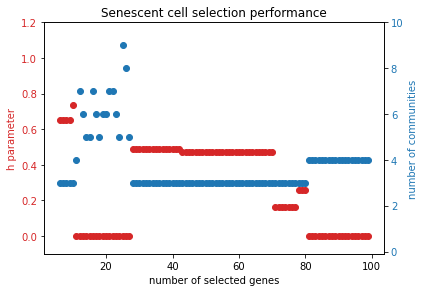

In [60]:
tuple_df, rel_path = selecting_genes("df_filteredKS_142/df_filteredKS.csv_ECFS_protocol", 12, 'hval_142KSfiltered.png')

We see that the best h-score is obtained for the top 10 genes.

In [62]:
top10genes_comm = tuple_df.comm_structure.loc[4]

In [63]:
top10genes_comm

{1: {'G3F_mean',
  'G3M_mean',
  'G3S_mean',
  'G7FNSen_mean',
  'G7F_mean',
  'G7MNSen_mean',
  'G7M_mean',
  'G7S_mean',
  'Y3F_mean',
  'Y3M_mean',
  'Y3S_mean',
  'Y7F_mean',
  'Y7M_mean',
  'Y7S_mean'},
 0: {'G3MSen_mean',
  'G3SSen_mean',
  'G7FSen_mean',
  'G7MSen_mean',
  'Y3FSen_mean',
  'Y3MSen_mean',
  'Y3SSen_mean',
  'Y7FSen_mean',
  'Y7MSen_mean'},
 2: {'G3FNSen_mean',
  'G3FSen_mean',
  'G3MNSen_mean',
  'G3SNSen_mean',
  'G7SNSen_mean',
  'G7SSen_mean',
  'Y3FNSen_mean',
  'Y3MNSen_mean',
  'Y3SNSen_mean',
  'Y7FNSen_mean',
  'Y7MNSen_mean',
  'Y7SNSen_mean',
  'Y7SSen_mean'}}